In [1]:
import pandas as pd
import numpy as np 
import os 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest

In [3]:
path = os.path.join("Resources", "online_shoppers_intention.csv")

In [4]:
OSHIdf = pd.read_csv(path)

In [5]:
OSHIdf.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [6]:
OSHIdf.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

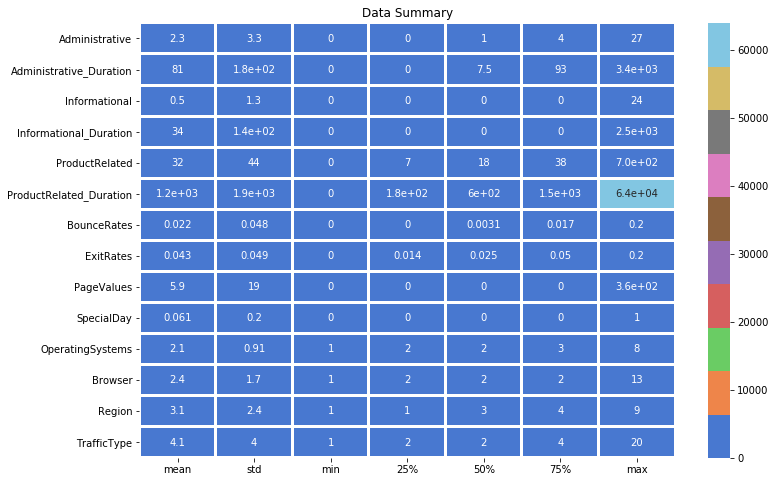

In [7]:
plt.figure(figsize = (12,8))
sns.heatmap(OSHIdf.describe()[1:].transpose(),
            annot=True,linecolor = "w",
            linewidth=2, cmap=sns.color_palette("muted"))
plt.title("Data Summary")
plt.show()

In [8]:
OSHIdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
#In python we need to distinguish between the matrix of features(Independent variables) and the dependent variable vector
OSHIX = OSHIdf.iloc[:, :-1]
OSHIX.shape

(12330, 17)

In [10]:
OSHIy = OSHIdf.iloc[:, :17:18]
OSHIy.shape

(12330, 1)

In [11]:
cleanOSHIX = OSHIX

In [12]:
#Handling non-numeric features/creating dummy or indicator variables 
cleanOSHIX = pd.get_dummies(cleanOSHIX, columns=['Month', 'VisitorType', 'Weekend'], drop_first = True)

In [13]:
cleanOSHIX.shape

(12330, 26)

In [14]:
cleanOSHIX.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,...,0,0,0,0,0,0,0,0,1,0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,...,0,0,0,0,0,0,0,0,1,0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,...,0,0,0,0,0,0,0,0,1,0


In [15]:
#Is there any NA in the dataset
cleanOSHIX.isna().sum()

Administrative                   0
Administrative_Duration          0
Informational                    0
Informational_Duration           0
ProductRelated                   0
ProductRelated_Duration          0
BounceRates                      0
ExitRates                        0
PageValues                       0
SpecialDay                       0
OperatingSystems                 0
Browser                          0
Region                           0
TrafficType                      0
Month_Dec                        0
Month_Feb                        0
Month_Jul                        0
Month_June                       0
Month_Mar                        0
Month_May                        0
Month_Nov                        0
Month_Oct                        0
Month_Sep                        0
VisitorType_Other                0
VisitorType_Returning_Visitor    0
Weekend_True                     0
dtype: int64

In [16]:
#Is there any null in the dataset 
cleanOSHIX.isnull().sum()

Administrative                   0
Administrative_Duration          0
Informational                    0
Informational_Duration           0
ProductRelated                   0
ProductRelated_Duration          0
BounceRates                      0
ExitRates                        0
PageValues                       0
SpecialDay                       0
OperatingSystems                 0
Browser                          0
Region                           0
TrafficType                      0
Month_Dec                        0
Month_Feb                        0
Month_Jul                        0
Month_June                       0
Month_Mar                        0
Month_May                        0
Month_Nov                        0
Month_Oct                        0
Month_Sep                        0
VisitorType_Other                0
VisitorType_Returning_Visitor    0
Weekend_True                     0
dtype: int64

In [17]:
cleanOSHIX["Administrative"].value_counts()

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
20       2
21       2
26       1
27       1
Name: Administrative, dtype: int64

In [18]:
#6562 user clicked on Administative pages and 5768 of them clicked on the other two(informational or product_related pages)
(cleanOSHIX["Administrative"] >= 1).value_counts()

True     6562
False    5768
Name: Administrative, dtype: int64

In [19]:
##9699 user clicked on AInformational pages and 2631 of them clicked on the other two(Adminstartive or product_related pages)
(cleanOSHIX["Informational"] >= 1).value_counts()

False    9699
True     2631
Name: Informational, dtype: int64

In [20]:
##12292 of user clicked on Administative pages and 38 of them clicked on the other two(informational or Administrative)
(cleanOSHIX["ProductRelated"] >= 1).value_counts()

True     12292
False       38
Name: ProductRelated, dtype: int64